In [1]:
import os
os.chdir(r"C:\Users\Eduardo\Documents\CARRERA\Udemy\deep_learning\course_2\week5\Regularization")

# Modularization  of Regularization Methods
As you probably figured out, there are a lot of commun pieces of code that all methods share. It is important to modularize code. Why? so that you do not repeat yourself over and over again.
** NOW WE WILL AUTOMATIZE THE CODE TO USE IT FOR WHATEVER CLASSIFIER OF YOUR PREFERENCE **

This notebook will cover the modularization of:
* **L2 Norm (Forbenuis Norm Regularization) Gradient Descent**
* **Dropout regularization Gradient Descent**

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import load_2D_dataset
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

In [3]:
# colors for print()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BLUE + "6/22/2020"+ color.END)

6/22/2020


### Load Dataset:

SUMMARY OF DATA SET: 

size of trainning data:  211
size of test data:  200 

X_train: (2, 211) y_train (1, 211)
X_test: (2, 200) y_test (1, 200)


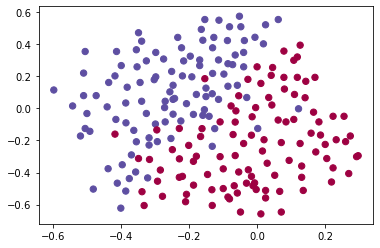

In [4]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

m_train= train_X.shape[1]
m_test = test_X.shape[1] 
print(color.BLUE + "SUMMARY OF DATA SET: \n" + color.END)
print("size of trainning data: ",m_train)
print("size of test data: ",m_test,"\n")

print("X_train:",train_X.shape,"y_train",train_Y.shape)
print("X_test:",test_X.shape,"y_test",test_Y.shape)

# Every Neural Net is divided into at least:
<br>
<font color='blue'>
1.Intialization<br>
<font color='green'>
2.FeedForward<br>
<font color='purple'>  
3.Cost<br>
<font color='red'>
4.BackPropagation<br>
<font color='brown'>
5.Optimization algorithm (such as Gradient Descent)<br>
<font color='black'>
6.Evaluation<br>

We will code our Neural Network acoording to this order, but first we need to decleare  the **activation functions** we will use:

### Activation Functions:

In [5]:
def Sigmoid(Z):
    s = 1/(1+np.exp(-Z))
    return s

def ReLU(Z):
    return Z * (Z > 0)

# Derivatives of Activation Functions:

def dSigmoid(A):
    return A*(1-A)

def dReLU(Z):
    return 1 * (Z > 0)


### 1.Intialization
<font color='black'>
<br>
For this examples we will Use Xavier Initalization, which is similar to He 

Xavier: $ \frac{1}{\sqrt{ l - 1}} $

He:  $ \sqrt{\frac{2}{l - 1}} $

In [6]:
def initialize_parameters_xavier(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    Xavier = 1/sqrt(l-1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

def initialize_parameters_he(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    Xavier = 1/sqrt(l-1)
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):                                                          
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])  *  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

### 2.- Feed Forward

In [7]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation
    """
    forward = {}
    forward["A" + str(0)] = X # set A0 to X this will be very helpful for for loopimplementation
    
    Num_of_parameters = len(parameters) // 2  # since we have W and b's  (but W and b share the same indexing for 1 layer)

    for i in range(1,Num_of_parameters+1):
        # LINEAR
        forward["Z"+str(i)] = np.dot(parameters["W"+str(i)], forward["A" + str(i-1)]) + parameters["b"+str(i)]
        
        #ACTIVATION
        if i != Num_of_parameters: # last layer has to have a SIGMOID activation 
            forward["A"+str(i)] = ReLU(forward["Z"+str(i)])
        else:
            forward["A"+str(i)] = Sigmoid(forward["Z"+str(i)])
            
    AL =  forward["A"+str(i)]
    
    return AL, forward

### 3.- Cost 

In [8]:
def compute_cost(AL, Y):
    """
    Implement the cost function
    """
    m = Y.shape[1]
    
    logprobs = np.multiply(-np.log(AL),Y) + np.multiply(-np.log(1 - AL), 1 - Y)
    cost = 1./m * np.nansum(logprobs)
    
    return cost

### 4.- BackPropagation

In [9]:
def backward_propagation(X, Y,forward,parameters):
    """
    Implement the backward propagation 
    """
    m = X.shape[1]
    gradients = {}
    Num_of_parameters = len(parameters) // 2
    
    AL = list(forward)[-1] #calls last element of dicitonari in this cas AL
    gradients["dZ"+str(Num_of_parameters)] =  forward[AL] - Y #Derivative respect to cost multiply by derivative of sig
    
    for i in range(Num_of_parameters,0,-1):      
        
        if i != Num_of_parameters: # we have already calcualted dZ for AL
            
            gradients["dA"+str(i)]  = np.dot(parameters["W"+str(i+1)].T, gradients["dZ"+str(i+1)])
            gradients["dZ"+str(i)]  = np.multiply(gradients["dA"+str(i)],dReLU(forward["A"+str(i)]))
        
        gradients["dW"+str(i)] = 1./m * np.dot(gradients["dZ"+str(i)],forward["A"+str(i-1)].T)
        gradients["db"+str(i)] = 1./m * np.sum(gradients["dZ"+str(i)], axis=1, keepdims = True)
    
    return gradients

### 5.-Gradient Descent 

In [10]:
def update_parameters(parameters, gradients, learning_rate):
    n = len(parameters) // 2 # number of layers in the neural networks
    # Update rule for each parameter
    for k in range(n):
        parameters["W" + str(k+1)] = parameters["W" + str(k+1)] - learning_rate * gradients["dW" + str(k+1)]
        parameters["b" + str(k+1)] = parameters["b" + str(k+1)] - learning_rate * gradients["db" + str(k+1)]
        
    return parameters

#### 6.- Evaluation

In [11]:
def predict(X, y, parameters):
    m = X.shape[1]
    p = np.zeros((1,m), dtype = np.int)
    
    # Forward propagation
    AL,forward = forward_propagation(X, parameters)
    
    # convert probas to 0/1 predictions
    for i in range(0, AL.shape[1]):
        if AL[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
            
    print("Accuracy: "  + str(np.mean((p[0,:] == y[0,:]))))
    
    return p

def predict_dec(parameters, X):
    """
    Used for plotting decision boundary.
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (m, K)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Predict using forward propagation and a classification threshold of 0.5
    AL,forward = forward_propagation(X, parameters)
    predictions = (AL>0.5)
    return predictions

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()
    

#### FINAL STEP: COMNINING EVERYTHING INTO A MODEL

In [12]:
def model(X, Y, layers_dims, learning_rate = 0.3, num_iterations = 30000 , print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters_xavier(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            AL,forward = forward_propagation(X, parameters)
        elif keep_prob < 1:
            AL, forward, dropout = forward_propagation_with_dropout(X, parameters, keep_prob )
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(AL, Y)
        else:
            cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            gradients = backward_propagation(X,Y,forward,parameters)
        elif lambd != 0:
            gradients = backward_propagation_with_regularization(X, Y,forward,parameters, lambd)
        elif keep_prob < 1:
            gradients= backward_propagation_with_dropout(X, Y,forward,parameters, keep_prob,dropout)
        
        # Update parameters.
        parameters = update_parameters(parameters, gradients, learning_rate)
        # Print the loss every 10000 iterations
        if print_cost and i % 10000== 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.grid()
    plt.show()
    
    return parameters

In [13]:
# Neural Architecture:
layers_dims = [train_X.shape[0], 20,20, 3, 1]
learning_rate = 0.03
num_iterations = 30000

Cost after iteration 0: 0.6724414476220321
Cost after iteration 10000: 0.16904904581457594
Cost after iteration 20000: 0.12175675294462203


C:\Users\Eduardo\Documents\CARRERA\Udemy\Deep_Learning_Prerequisites_The_Numpy_Stack_in_Python\machine_learning_env\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Eduardo\Documents\CARRERA\Udemy\Deep_Learning_Prerequisites_The_Numpy_Stack_in_Python\machine_learning_env\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


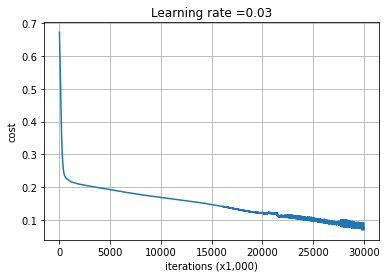

On the training set:
Accuracy: 0.976303317535545
On the test set:
Accuracy: 0.93


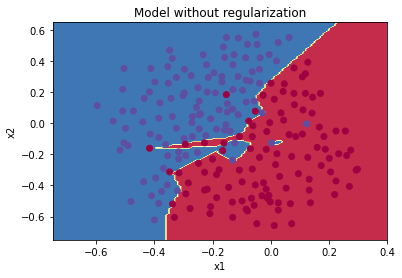

In [14]:
parameters = model(train_X, train_Y,layers_dims,learning_rate,num_iterations)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

It looks there is a lot of overfitting

#  2- L2 Regularization (forbenius norm)
The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

In [15]:
def compute_cost_with_regularization(AL, Y, parameters, lambd):
    m = Y.shape[1]
    
    
    Num_of_parameters = len(parameters) // 2  # since we have W and b's  (but W and b share the same indexing for 1 layer)
    ######################################### FORBENUIS NORM ############################################
    L2_regularization_cost = 0
    for i in range(1,Num_of_parameters+1):
        L2_regularization_cost += np.sum(np.square(parameters["W"+str(i)]))
    L2_regularization_cost *= (lambd/(2*m))
    ######################################### FORBENUIS NORM ############################################
    
    cross_entropy_cost = compute_cost(AL, Y) # This gives you the cross-entropy part of the cost
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

def backward_propagation_with_regularization(X, Y,forward,parameters, lambd):
    """
    Implement the backward propagation 
    """
    m = X.shape[1]
    gradients = {}
    Num_of_parameters = len(parameters) // 2
    
    AL = list(forward)[-1] #calls last element of dicitonari in this cas AL
    gradients["dZ"+str(Num_of_parameters)] =  forward[AL] - Y #Derivative respect to cost multiply by derivative of sig
    
    for i in range(Num_of_parameters,0,-1):      
        
        if i != Num_of_parameters: # we have already calcualted dZ for AL
            
            gradients["dA"+str(i)]  = np.dot(parameters["W"+str(i+1)].T, gradients["dZ"+str(i+1)])
            gradients["dZ"+str(i)]  = np.multiply(gradients["dA"+str(i)],dReLU(forward["A"+str(i)]))
        
        gradients["dW"+str(i)] = 1./m * np.dot(gradients["dZ"+str(i)],forward["A"+str(i-1)].T) + (lambd/m)*parameters["W"+str(i)]
        gradients["db"+str(i)] = 1./m * np.sum(gradients["dZ"+str(i)], axis=1, keepdims = True)
    
    return gradients

In [16]:
# Neural Architecture:
layers_dims = [train_X.shape[0], 20, 3, 1]
layers_dims = [train_X.shape[0], 20,20, 3, 1]
learning_rate = 0.003 # we added a zero to the learning rate in order to get rid of oscilations 
num_iterations = 30000

Cost after iteration 0: 0.7489296767555484
Cost after iteration 10000: 0.3100997141533468
Cost after iteration 20000: 0.2969895577140853


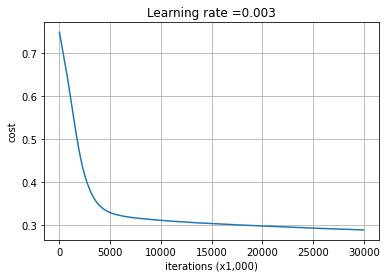

On the train set:
Accuracy: 0.933649289099526
On the test set:
Accuracy: 0.93


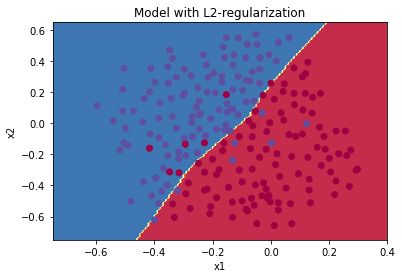

In [17]:
parameters = model(train_X, train_Y,layers_dims,learning_rate=learning_rate, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

There is not overfitting anymore 

## 3 - Dropout

Finally, **dropout** is a widely used regularization technique that is specific to deep learning. 
**It randomly shuts down some neurons in each iteration.

When you shut some neurons down, you actually modify your model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time.

In [18]:
def forward_propagation_with_dropout(X, parameters, keep_prob ):
    """
    Implements the forward propagation
    """
    np.random.seed(1)
    dropout ={}
    forward = {}
    forward["A" + str(0)] = X # set A0 to X this will be very helpful for for loopimplementation
    
    Num_of_parameters = len(parameters) // 2  # since we have W and b's  (but W and b share the same indexing for 1 layer)

    for i in range(1,Num_of_parameters+1):
        # LINEAR
        forward["Z"+str(i)] = np.dot(parameters["W"+str(i)], forward["A" + str(i-1)]) + parameters["b"+str(i)]
        
        # DROPOUT IS ONLY APPLIED TO HIDEN LAYERS 
        if i != Num_of_parameters: # last layer has to have a SIGMOID activation 
            forward["A"+str(i)] = ReLU(forward["Z"+str(i)])
            dropout["D"+str(i)]  = np.random.rand(*forward["A"+str(i)].shape)
            dropout["D"+str(i)]  = ( dropout["D"+str(i)]  < keep_prob ).astype(int) 
            forward["A"+str(i)] = forward["A"+str(i)]*dropout["D"+str(i)]
            forward["A"+str(i)] = forward["A"+str(i)]  / keep_prob  
        else:
            forward["A"+str(i)] = Sigmoid(forward["Z"+str(i)])
            
    AL =  forward["A"+str(i)]
    
    return AL, forward, dropout


def backward_propagation_with_dropout(X, Y,forward,parameters, keep_prob,dropout):
    """
    Implement the backward propagation 
    """
    m = X.shape[1]
    gradients = {}
    Num_of_parameters = len(parameters) // 2
    
    AL = list(forward)[-1] #calls last element of dicitonari in this cas AL
    gradients["dZ"+str(Num_of_parameters)] =  forward[AL] - Y #Derivative respect to cost multiply by derivative of sig
    
    for i in range(Num_of_parameters,0,-1):      
        
        if i != Num_of_parameters: # we have already calcualted dZ for AL
            
            gradients["dA"+str(i)]  = np.dot(parameters["W"+str(i+1)].T, gradients["dZ"+str(i+1)])
            gradients["dA"+str(i)]  = gradients["dA"+str(i)]*dropout["D"+str(i)]
            gradients["dA"+str(i)]  =  gradients["dA"+str(i)] /  keep_prob
            gradients["dZ"+str(i)]  = np.multiply(gradients["dA"+str(i)],dReLU(forward["A"+str(i)]))
        
        gradients["dW"+str(i)] = 1./m * np.dot(gradients["dZ"+str(i)],forward["A"+str(i-1)].T)
        gradients["db"+str(i)] = 1./m * np.sum(gradients["dZ"+str(i)], axis=1, keepdims = True)
    
    return gradients

In [19]:
# Neural Architecture:
#layers_dims = [train_X.shape[0], 20, 3, 1]
layers_dims = [train_X.shape[0], 20,20, 3, 1]
learning_rate = 0.03 # we added a zero to the learning rate in order to get rid of oscilations 
num_iterations = 30000

Cost after iteration 0: 0.6686707775504737
Cost after iteration 10000: 0.09968585437867372


C:\Users\Eduardo\Documents\CARRERA\Udemy\Deep_Learning_Prerequisites_The_Numpy_Stack_in_Python\machine_learning_env\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Eduardo\Documents\CARRERA\Udemy\Deep_Learning_Prerequisites_The_Numpy_Stack_in_Python\machine_learning_env\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


Cost after iteration 20000: 0.05249445101365122


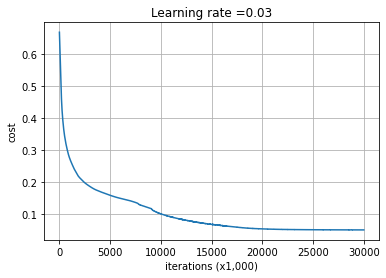

On the train set:
Accuracy: 0.9241706161137441
On the test set:
Accuracy: 0.93


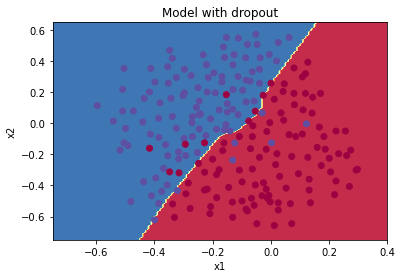

In [20]:
parameters = model(train_X, train_Y,layers_dims=layers_dims  ,keep_prob = 0.86, learning_rate=learning_rate)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

Even better than Norm 2 regularized. there is no overfitting but we still get a quite powerfull decision boundary


**What we want you to remember from this notebook**:
<br>
- Modularization enables you to spot errors more easily and correct them if need. it also helps to reuse the code.
<br>
- Regularization will help you reduce overfitting.
<br>
- Regularization will drive your weights to lower values.
<br>
- L2 regularization and Dropout are two very effective regularization techniques.
<br>